In [8]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
import math as mh
#from mayavi import mlab


3.10.4


In [9]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [10]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [11]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


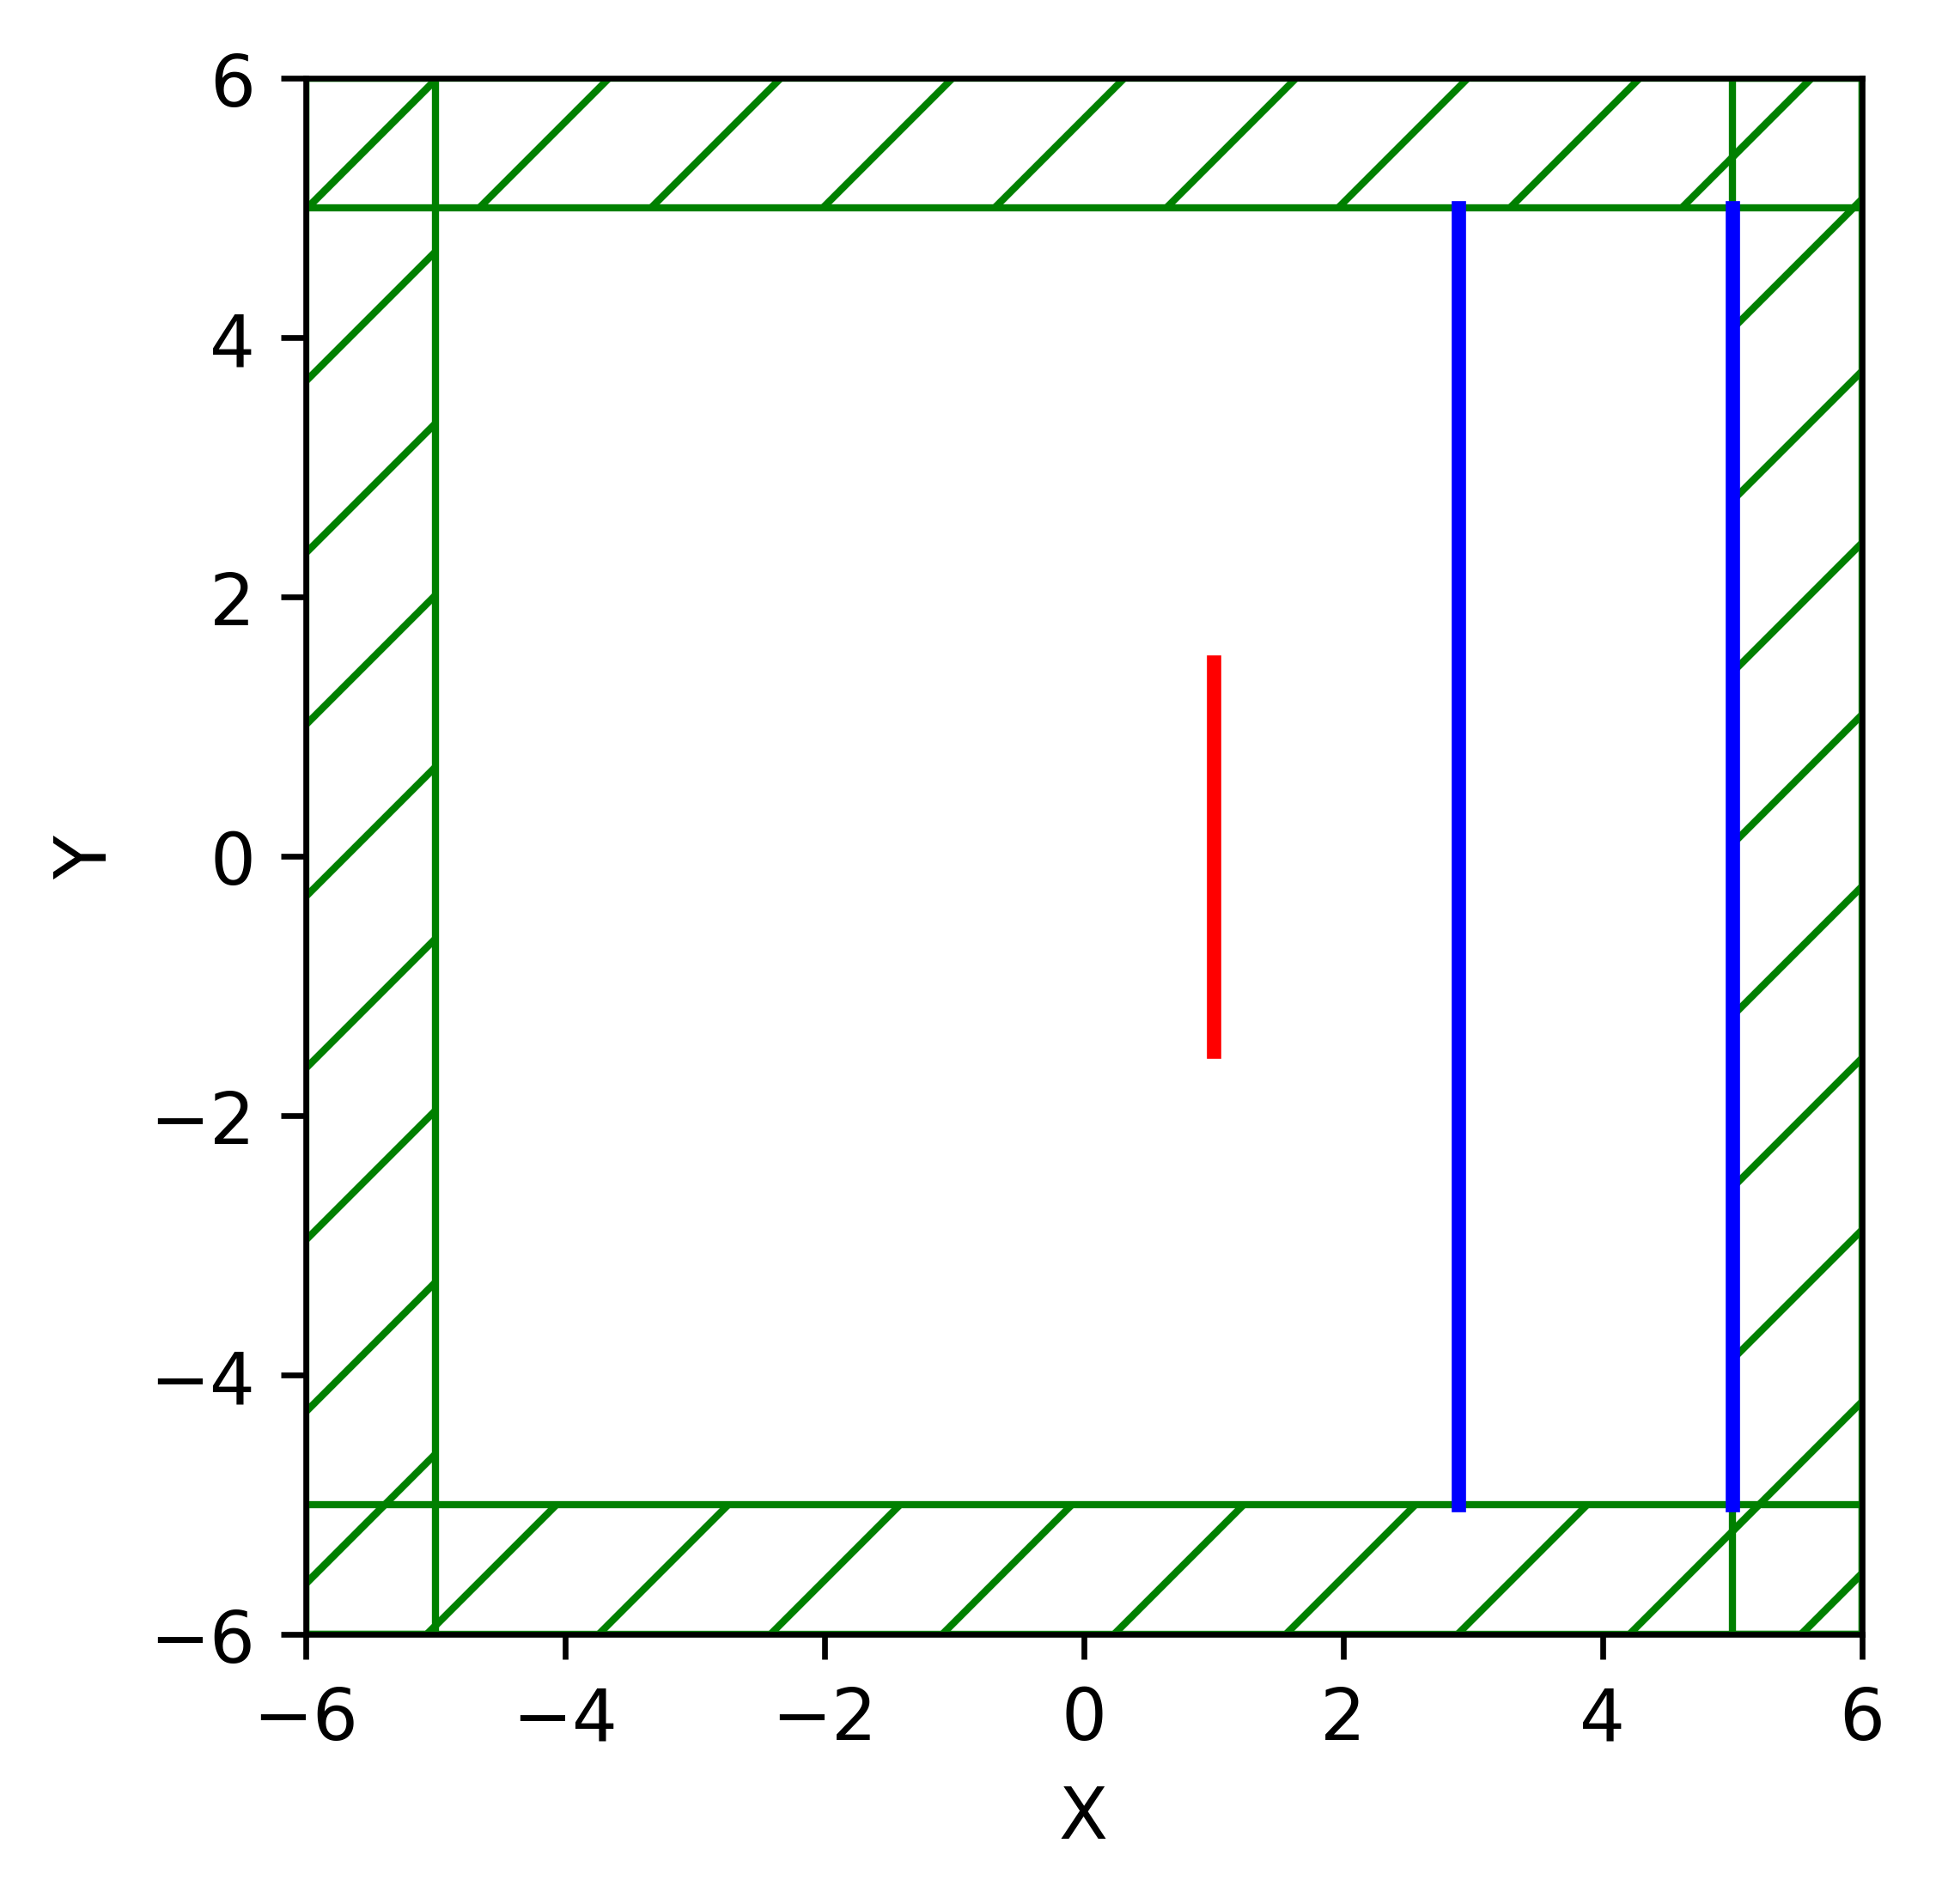

In [12]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [13]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000527859 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.769713 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1096 (time=10.96), 0.00365131 s/step
on time step 2231 (time=22.31), 0.00352763 s/step
on time step 3202 (time=32.02), 0.00412233 s/step
on time step 4116 (time=41.16), 0.00437883 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5208 (time=52.08), 0.00366443 s/step
on time step 6307 (time=63.07), 0.00364001 s/step
on time step 7412 (time=74.12), 0.00362609 s/step
on time step 8397 (time=83.97), 0.00406147 s/step
on time step 9642 (time=96.42), 0.00321474 s/step
field decay(t = 100.01): 6.323761485647929e-14 / 0.39441514008126954

In [14]:
#no_ARC_tran_flux = mp.get_fluxes(tran_1)
#no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.76054817e-06, 2.88028942e-06, 3.00486953e-06, 3.13460256e-06,
       3.26967552e-06, 3.41020291e-06, 3.55632439e-06, 3.70827487e-06,
       3.86638708e-06, 4.03103669e-06, 4.20257459e-06, 4.38128944e-06,
       4.56741487e-06, 4.76116420e-06, 4.96276398e-06, 5.17246948e-06,
       5.39056566e-06, 5.61736678e-06, 5.85322067e-06, 6.09850845e-06,
       6.35362592e-06, 6.61894567e-06, 6.89478120e-06, 7.18138515e-06,
       7.47899901e-06, 7.78793699e-06, 8.10865544e-06, 8.44175749e-06,
       8.78791765e-06, 9.14776315e-06, 9.52178259e-06, 9.91032233e-06,
       1.03136790e-05, 1.07322356e-05, 1.11665589e-05, 1.16173988e-05,
       1.20855929e-05, 1.25719372e-05, 1.30771050e-05, 1.36016586e-05,
       1.41461355e-05, 1.47111467e-05, 1.52974193e-05, 1.59057653e-05,
       1.65370108e-05, 1.71919461e-05, 1.78713381e-05, 1.85759920e-05,
       1.93068125e-05, 2.00648089e-05, 2.08510340e-05, 2.16664962e-05,
       2.25121096e-05, 2.33887228e-05, 2.42972130e-05, 2.52385842e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00177288 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,4.675,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,4.05,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,3.425,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, cent

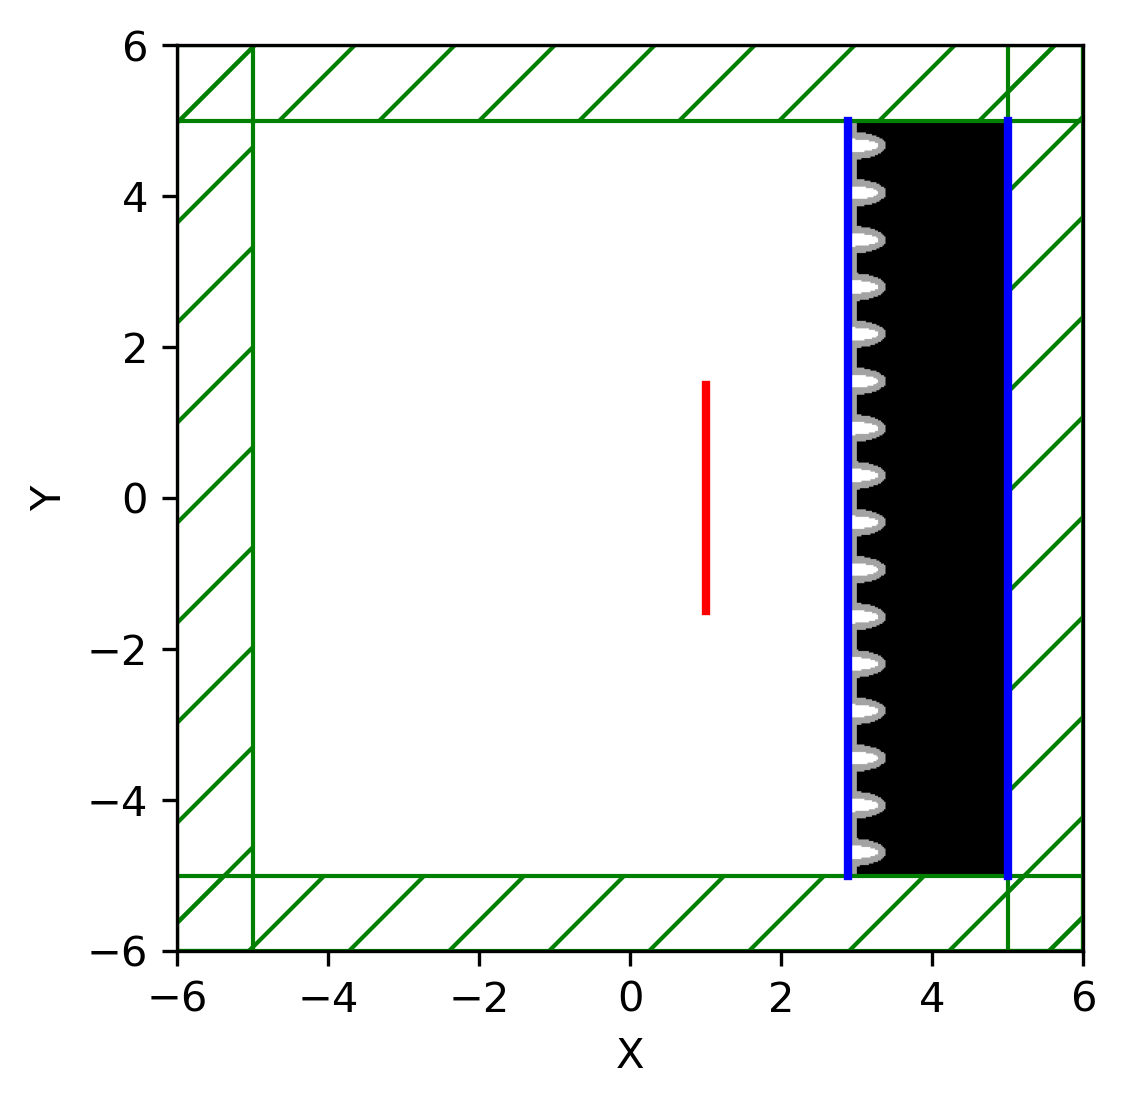

In [15]:
sim.reset_meep()

# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Ellipsoid(
                            size = mp.Vector3(2*(size_x+T_Arc), 
                                              size_y*((size_x+T_Arc)/size_x), 
                                              mp.inf),
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc), -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Ellipsoid(
                            size = mp.Vector3(2*(size_x), 
                                              size_y*((size_x+T_Arc)/size_x)-2*T_Arc, 
                                              mp.inf),
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )


geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*size_x, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-size_x, 0), 
                      material = mp.Medium(epsilon=eps_air),
                    )
                )

        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [16]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 452 (time=4.52), 0.00886342 s/step
on time step 841 (time=8.41), 0.0103754 s/step
on time step 1112 (time=11.12), 0.0147971 s/step
on time step 1394 (time=13.94), 0.0143844 s/step
on time step 1508 (time=15.08), 0.035117 s/step
on time step 1632 (time=16.32), 0.0329331 s/step
on time step 1707 (time=17.07), 0.0544171 s/step
on time step 1882 (time=18.82), 0.0229477 s/step
field decay(t = 20.01): 0.0015914239209586006 / 0.0015914239209586006 = 1.0
on time step 2046 (time=20.46), 0.0244873 s/step
on time step 2295 (time=22.95), 0.01612 s/step
on time step 2470 (time=24.7), 0.0228736 s/step
on time step 2809 (time=28.09), 0.0118006 s/step
on time step 3110 (time=31.1), 0.0132988 s/step
on time step 3515 (time=35.15), 0.00988857 s/step
on time step 3881 (time=38.81), 0.0109492 s/step
field decay(t = 40.02): 6.901476596695652e-05 / 0.0015914239209586006 = 0.04336667625643405
on time step 4356 (time=43.56), 0.00843165 s/step
on time step 4683 (time=46.83), 0.0122443 s/step
on ti

In [17]:
#no_ARC_refl_data

In [18]:
#no_ARC_refl_flux

In [19]:
#with_ARC_refl_flux

In [20]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('ellipsoid_with_ARC.csv')

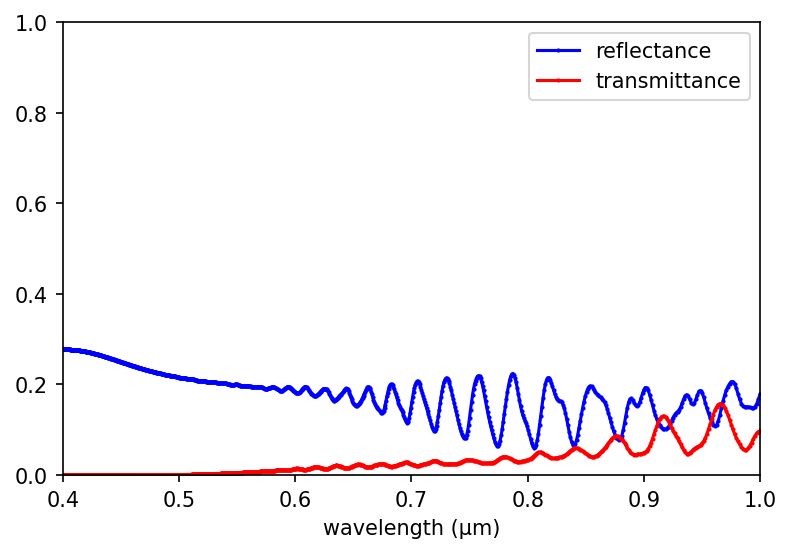

In [21]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()